<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/Annotation_Match_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
!pip install gffpandas
!sudo apt-get install bedops
!pip install biopython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bedops is already the newest version (2.4.40+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [157]:
bath_prokka_aligned_annotations = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Iteration_Sep30/Aligned Outputs/Aligned_Outputs.xlsx"
annotation_match_storage = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Iteration_Sep30/Aligned Outputs/Aligned_COGs.xlsx"
#length_comparison_output = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/BIN152/bin152_length_comparison.xlsx'
annotation_match_storage2 = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Iteration_Sep30/Aligned Outputs/Aligned_COGs2.xlsx"


In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd
from Bio import SeqIO
import requests
import re

In [159]:
alignments = pd.read_excel(bath_prokka_aligned_annotations)
alignment2 = alignments[alignments['label']=="BATH and Prokka Annotated"]

In [160]:
alignment_overlaps = pd.read_excel(annotation_match_storage)
alignment_overlaps2 = pd.read_excel(annotation_match_storage2)

In [161]:
alignment_overlaps = pd.concat([alignment_overlaps,alignment_overlaps2])

In [162]:
alignment_overlaps = pd.merge(alignment2,alignment_overlaps,how='outer',on=['Prokka','BATH'])

In [163]:
# Initialize 'Annotation_Match' column to 'No'
alignment_overlaps['Annotation_Match'] = 'No'
alignment_overlaps['Prokka Protein'] = ""
alignment_overlaps['BATH Protein'] = ""

# Filter rows where label is "BATH and Prokka Annotated"
mask = alignment_overlaps['label_x'] == "BATH and Prokka Annotated"

# Extract Prokka Protein
alignment_overlaps.loc[mask, 'Prokka Protein'] = (
    alignment_overlaps.loc[mask, 'Prokka']
    .str.split(":").str[-1]  # Get the part after the last ':'
    .str.split("\t").str[0]  # Get the part before the first tab
)

# Extract BATH Protein
alignment_overlaps.loc[mask, 'BATH Protein'] = (
    alignment_overlaps.loc[mask, 'BATH']
    .str.split("\t").str[3]  # Get the fourth tab-separated element
)

# Compare Prokka Protein and BATH Protein and update 'Annotation_Match'
alignment_overlaps.loc[mask, 'Annotation_Match'] = (
    alignment_overlaps.loc[mask, 'Prokka Protein'] == alignment_overlaps.loc[mask, 'BATH Protein']
).map({True: 'Yes', False: 'No'})

alignment_overlaps

,Prokka,BATH,label_x,label_y,Annotation_Match,Prokka Protein,BATH Protein,Prokka COGs,BATH COGs,Unnamed: 0,Name_or_COG_Match
0,NODE_10005_length_3878_cov_2.511117_bin.33\t24...,NODE_10005_length_3878_cov_2.511117_bin.33\t26...,BATH and Prokka Annotated,NaN,No,MF_01005,O86311,COG4138,COG1131,31157.0,No
1,NODE_10005_length_3878_cov_2.511117_bin.33\t24...,NODE_10005_length_3878_cov_2.511117_bin.33\t26...,BATH and Prokka Annotated,NaN,No,MF_01005,O86311,COG4138,COG1131,31157.0,NaN
2,NODE_10005_length_3878_cov_2.511117_bin.33\t32...,NODE_10005_length_3878_cov_2.511117_bin.33\t33...,BATH and Prokka Annotated,NaN,Yes,O34712,O34712,NaN,NaN,NaN,NaN
3,NODE_10021_length_1769_cov_1.567095_bin.4\t953...,NODE_10021_length_1769_cov_1.567095_bin.4\t104...,BATH and Prokka Annotated,NaN,Yes,MF_01987,MF_01987,NaN,NaN,NaN,NaN
4,NODE_10021_length_1769_cov_1.567095_bin.4\t953...,NODE_10021_length_1769_cov_1.567095_bin.4\t136...,BATH and Prokka Annotated,BATH and Prokka Annotated,No,MF_01987,Q53W83,NaN,KOG2855,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
18174,NODE_9997_length_2187_cov_1.946529_bin.12\t138...,NODE_9997_length_2187_cov_1.946529_bin.12\t139...,BATH and Prokka Annotated,BATH and Prokka Annotated,No,P31080,MF_00015,COG1974,COG1974,NaN,Yes
18175,NODE_9997_length_2187_cov_1.946529_bin.12\t586...,NODE_9997_length_2187_cov_1.946529_bin.12\t598...,BATH and Prokka Annotated,NaN,Yes,MF_00819,MF_00819,NaN,NaN,NaN,NaN
18176,NODE_9997_length_2187_cov_1.946529_bin.12\t586...,NODE_9997_length_2187_cov_1.946529_bin.12\t925...,BATH and Prokka Annotated,NaN,Yes,MF_00819,MF_00819,NaN,NaN,NaN,NaN
18177,NODE_9998_length_2081_cov_2.067127_bin.40\t126...,NODE_9998_length_2081_cov_2.067127_bin.40\t102...,BATH and Prokka Annotated,BATH and Prokka Annotated,No,MF_01395,MF_00823,COG0825,COG0777,NaN,No


In [164]:
alignment_overlaps.loc[alignment_overlaps['BATH COGs'] == alignment_overlaps['Prokka COGs'], 'Name_or_COG_Match'] = 'Yes'
alignment_overlaps.loc[alignment_overlaps['Name_or_COG_Match'] != 'Yes', 'Name_or_COG_Match'] = 'No'

In [165]:
alignment_overlaps['Annotation_Match'].value_counts()

,count
Annotation_Match,
No,11037
Yes,7142


In [166]:
alignment_overlaps[alignment_overlaps['Annotation_Match']=="No"]['Name_or_COG_Match'].value_counts()

,count
Name_or_COG_Match,
No,5697
Yes,5340


In [167]:
# Update for Annotation_Match == "Yes"
alignment_overlaps.loc[alignment_overlaps['Annotation_Match'] == "Yes", 'Name_or_COG_Match'] = "Yes"

# Update for Annotation_Match == "No" and Name_or_COG_Match == "Yes"
alignment_overlaps.loc[
    (alignment_overlaps['Annotation_Match'] == "No") &
    (alignment_overlaps['Name_or_COG_Match'] == "Yes"),
    'Name_or_COG_Match'
] = "Yes"

# Update for Annotation_Match == "No" and Name_or_COG_Match == "No"
alignment_overlaps.loc[
    (alignment_overlaps['Annotation_Match'] == "No") &
    (alignment_overlaps['Name_or_COG_Match'] == "No"),
    'Name_or_COG_Match'
] = "No"

alignment_overlaps

,Prokka,BATH,label_x,label_y,Annotation_Match,Prokka Protein,BATH Protein,Prokka COGs,BATH COGs,Unnamed: 0,Name_or_COG_Match
0,NODE_10005_length_3878_cov_2.511117_bin.33\t24...,NODE_10005_length_3878_cov_2.511117_bin.33\t26...,BATH and Prokka Annotated,NaN,No,MF_01005,O86311,COG4138,COG1131,31157.0,No
1,NODE_10005_length_3878_cov_2.511117_bin.33\t24...,NODE_10005_length_3878_cov_2.511117_bin.33\t26...,BATH and Prokka Annotated,NaN,No,MF_01005,O86311,COG4138,COG1131,31157.0,No
2,NODE_10005_length_3878_cov_2.511117_bin.33\t32...,NODE_10005_length_3878_cov_2.511117_bin.33\t33...,BATH and Prokka Annotated,NaN,Yes,O34712,O34712,NaN,NaN,NaN,Yes
3,NODE_10021_length_1769_cov_1.567095_bin.4\t953...,NODE_10021_length_1769_cov_1.567095_bin.4\t104...,BATH and Prokka Annotated,NaN,Yes,MF_01987,MF_01987,NaN,NaN,NaN,Yes
4,NODE_10021_length_1769_cov_1.567095_bin.4\t953...,NODE_10021_length_1769_cov_1.567095_bin.4\t136...,BATH and Prokka Annotated,BATH and Prokka Annotated,No,MF_01987,Q53W83,NaN,KOG2855,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
18174,NODE_9997_length_2187_cov_1.946529_bin.12\t138...,NODE_9997_length_2187_cov_1.946529_bin.12\t139...,BATH and Prokka Annotated,BATH and Prokka Annotated,No,P31080,MF_00015,COG1974,COG1974,NaN,Yes
18175,NODE_9997_length_2187_cov_1.946529_bin.12\t586...,NODE_9997_length_2187_cov_1.946529_bin.12\t598...,BATH and Prokka Annotated,NaN,Yes,MF_00819,MF_00819,NaN,NaN,NaN,Yes
18176,NODE_9997_length_2187_cov_1.946529_bin.12\t586...,NODE_9997_length_2187_cov_1.946529_bin.12\t925...,BATH and Prokka Annotated,NaN,Yes,MF_00819,MF_00819,NaN,NaN,NaN,Yes
18177,NODE_9998_length_2081_cov_2.067127_bin.40\t126...,NODE_9998_length_2081_cov_2.067127_bin.40\t102...,BATH and Prokka Annotated,BATH and Prokka Annotated,No,MF_01395,MF_00823,COG0825,COG0777,NaN,No


In [168]:
alignment_overlaps.Name_or_COG_Match.value_counts()

,count
Name_or_COG_Match,
Yes,12482
No,5697


In [169]:
alignment_overlaps['Category'] = None

# Assign categories based on the conditions
alignment_overlaps.loc[(alignment_overlaps['Name_or_COG_Match'] == 'Yes'), 'Category'] = 'Match Annotations'
alignment_overlaps.loc[
    (alignment_overlaps['Name_or_COG_Match'] == 'No') &
    (~alignment_overlaps['Prokka COGs'].isna()) &
    (~alignment_overlaps['BATH COGs'].isna()),
    'Category'
] = 'Mismatch Annotations'
alignment_overlaps.loc[
    (alignment_overlaps['Name_or_COG_Match'] == 'No') &
    (alignment_overlaps['Prokka COGs'].isna()) &
    (alignment_overlaps['BATH COGs'].isna()),
    'Category'
] = 'Missing Both'
alignment_overlaps.loc[
    (alignment_overlaps['Name_or_COG_Match'] == 'No') &
    (alignment_overlaps['BATH COGs'].isna()) &
    (~alignment_overlaps['Prokka COGs'].isna()),
    'Category'
] = 'Missing COGs BATH'
alignment_overlaps.loc[
    (alignment_overlaps['Name_or_COG_Match'] == 'No') &
    (alignment_overlaps['Prokka COGs'].isna()) &
    (~alignment_overlaps['BATH COGs'].isna()),
    'Category'
] = 'Missing COGs Prokka'

# Count rows in each category
category_counts = alignment_overlaps['Category'].value_counts()

print(category_counts)


Category
Match Annotations       12482
Mismatch Annotations     2721
Missing COGs BATH        1468
Missing COGs Prokka      1225
Missing Both              283
Name: count, dtype: int64


In [170]:
alignment_overlaps.loc[
    alignment_overlaps['Prokka Protein'].str.split("_").str[0] == "MF",
    'Source'
] = "HMMER"

In [171]:
hmmer_origin = alignment_overlaps[alignment_overlaps['Source'] == "HMMER"]
blast_origin = alignment_overlaps[alignment_overlaps['Source'] != "HMMER"]

In [172]:
!pip install squarify

In [173]:
alignment_overlaps.loc[mask, 'Prokka Binned'] = (
    alignment_overlaps.loc[mask, 'Prokka']
    .str.split("\t").str[0]
    .str.split("_").str[-1]
    .str.split(".").str[0]
)

alignment_overlaps.loc[mask, 'BATH Binned'] = (
    alignment_overlaps.loc[mask, 'BATH']
    .str.split("\t").str[0]
    .str.split("_").str[-1]
    .str.split(".").str[0]
)

In [174]:
# Compare 'BATH Binned' and 'Prokka Binned' columns for rows matching 'mask'
alignment_overlaps.loc[mask, 'Bin Status'] = (
    (alignment_overlaps.loc[mask, 'BATH Binned'] == 'bin') &
    (alignment_overlaps.loc[mask, 'Prokka Binned'] == 'bin')
).map({True: 'bin', False: 'unbinned'})


In [175]:
alignment_overlaps_binned = alignment_overlaps[alignment_overlaps['Bin Status'] == "bin"]

In [176]:
alignment_overlaps_unbinned = alignment_overlaps[alignment_overlaps['Bin Status'] != "bin"]

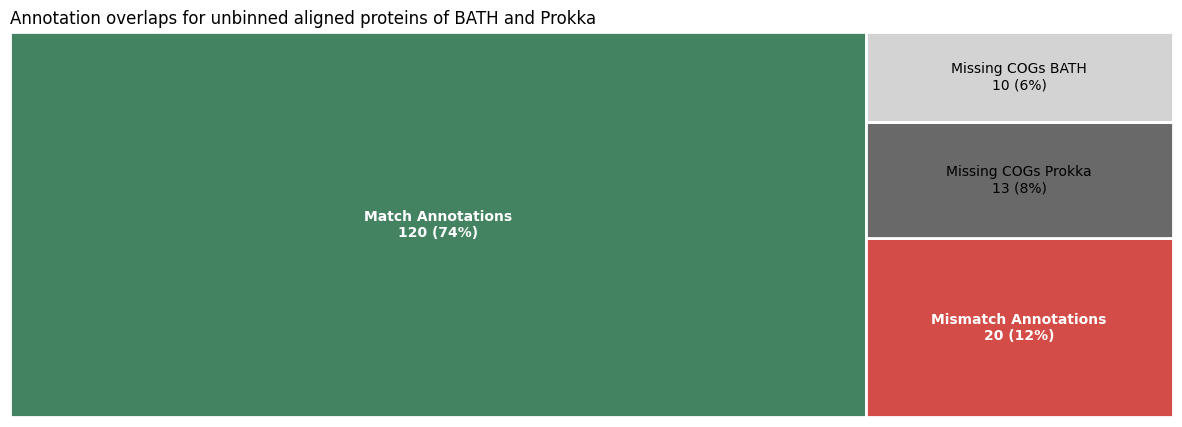

In [177]:
import matplotlib.pyplot as plt
import squarify

# Calculate counts for each category from the DataFrame
category_counts = alignment_overlaps_unbinned['Category'].value_counts()

# Data
categories = category_counts.index.tolist()
values = category_counts.values.tolist()
total = sum(values)

# Calculate percentages
percentages = [value / total * 100 for value in values]

# Create labels with percentages
labels = [f'{cat}\n{val} ({perc:.0f}%)' for cat, val, perc in zip(categories, values, percentages)]

# Plot the treemap
plt.figure(figsize=(15, 5))
colors = ['#448361', '#D44C47', '#696969', '#D3D3D3', '#A9A9A9']  # Customize as needed
squarify.plot(sizes=values, label=labels, color=colors[:len(categories)], edgecolor="white", linewidth=2)

# Customize text colors and make the first two labels bold and white
for i in range(len(labels)):
    text = plt.gca().texts[i]
    if i < 2:  # Customize highlighting for specific categories
        text.set_color('white')
        text.set_fontweight('bold')

plt.title('Annotation overlaps for unbinned aligned proteins of BATH and Prokka', loc='left')
plt.axis('off')  # Hide axes
plt.savefig("Fig5A_annotations_name.svg", dpi=300, transparent=True, bbox_inches='tight')
plt.show()


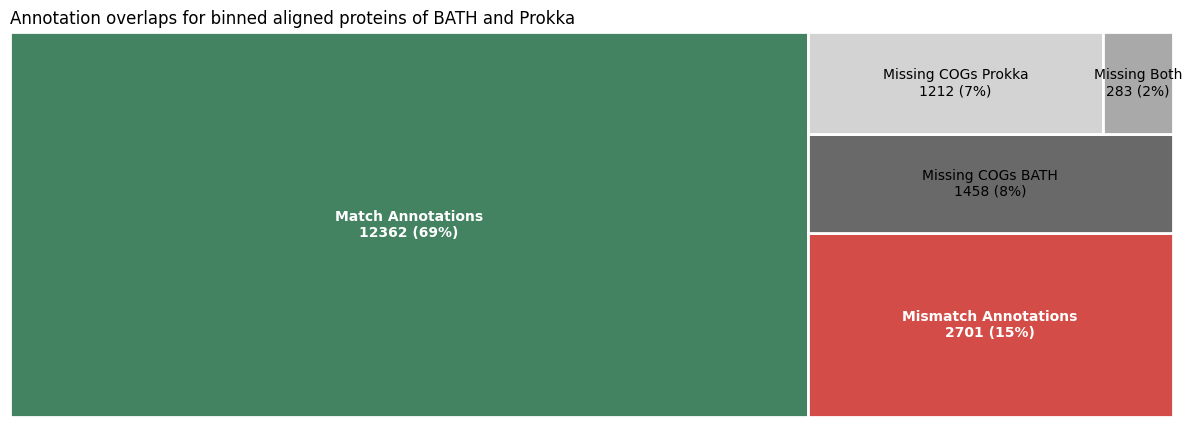

In [178]:
import matplotlib.pyplot as plt
import squarify

# Calculate counts for each category from the DataFrame
category_counts = alignment_overlaps_binned['Category'].value_counts()

# Data
categories = category_counts.index.tolist()
values = category_counts.values.tolist()
total = sum(values)

# Calculate percentages
percentages = [value / total * 100 for value in values]

# Create labels with percentages
labels = [f'{cat}\n{val} ({perc:.0f}%)' for cat, val, perc in zip(categories, values, percentages)]

# Plot the treemap
plt.figure(figsize=(15, 5))
colors = ['#448361', '#D44C47', '#696969', '#D3D3D3', '#A9A9A9']  # Customize as needed
squarify.plot(sizes=values, label=labels, color=colors[:len(categories)], edgecolor="white", linewidth=2)

# Customize text colors and make the first two labels bold and white
for i in range(len(labels)):
    text = plt.gca().texts[i]
    if i < 2:  # Customize highlighting for specific categories
        text.set_color('white')
        text.set_fontweight('bold')

plt.title('Annotation overlaps for binned aligned proteins of BATH and Prokka', loc='left')
plt.axis('off')  # Hide axes
plt.savefig("Fig5A_annotations_name.svg", dpi=300, transparent=True, bbox_inches='tight')
plt.show()


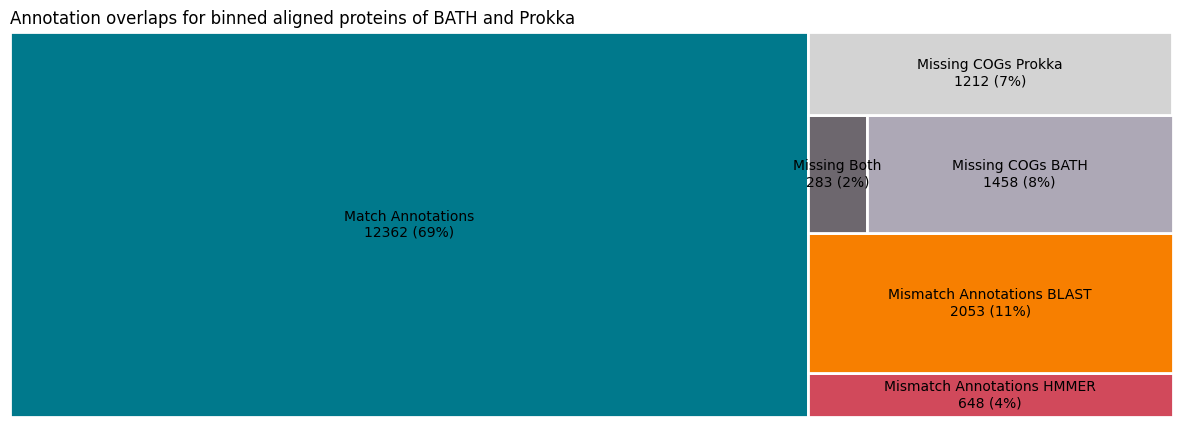

In [179]:
import matplotlib.pyplot as plt
import squarify

# Filter and divide "Mismatch Annotations"
mismatch_annotations = alignment_overlaps_binned[alignment_overlaps_binned['Category'] == "Mismatch Annotations"]
mismatch_hmmer = mismatch_annotations[mismatch_annotations['Source'] == "HMMER"].shape[0]
mismatch_blast = mismatch_annotations[mismatch_annotations['Source'] != "HMMER"].shape[0]

# Update category counts for the plot
category_counts = alignment_overlaps_binned['Category'].value_counts().to_dict()

# Replace "Mismatch Annotations" with its subcategories
categories = [
    'Match Annotations',
    'Mismatch Annotations HMMER',
    'Mismatch Annotations BLAST',
    'Missing Both',
    'Missing COGs BATH',
    'Missing COGs Prokka'
]
values = [
    category_counts.get('Match Annotations', 0),
    mismatch_hmmer,
    mismatch_blast,
    category_counts.get('Missing Both', 0),
    category_counts.get('Missing COGs BATH', 0),
    category_counts.get('Missing COGs Prokka', 0)
]

# Calculate percentages
total = sum(values)
percentages = [value / total * 100 for value in values]

# Create labels with percentages
labels = [f'{cat}\n{val} ({perc:.0f}%)' for cat, val, perc in zip(categories, values, percentages)]

# Plot the treemap
plt.figure(figsize=(15, 5))
colors = ['#00798c', '#d1495b', '#f77f00', '#6d676e', '#ada8b6', '#D3D3D3']  # Orange for HMMER, Yellow for BLAST
squarify.plot(sizes=values, label=labels, color=colors, edgecolor="white", linewidth=2)

plt.title('Annotation overlaps for binned aligned proteins of BATH and Prokka', loc='left')
plt.axis('off')  # Hide axes
plt.savefig("Fig5A_annotations_mismatch_split.svg", dpi=300, transparent=True, bbox_inches='tight')
plt.show()


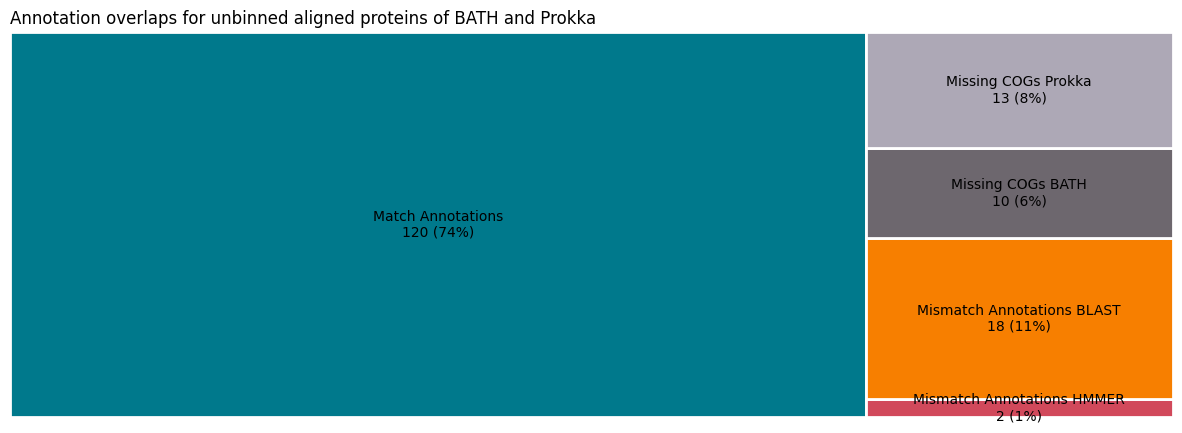

In [182]:
import matplotlib.pyplot as plt
import squarify

# Filter and divide "Mismatch Annotations"
mismatch_annotations = alignment_overlaps_unbinned[alignment_overlaps_unbinned['Category'] == "Mismatch Annotations"]
mismatch_hmmer = mismatch_annotations[mismatch_annotations['Source'] == "HMMER"].shape[0]
mismatch_blast = mismatch_annotations[mismatch_annotations['Source'] != "HMMER"].shape[0]

# Update category counts for the plot
category_counts = alignment_overlaps_unbinned['Category'].value_counts().to_dict()

# Replace "Mismatch Annotations" with its subcategories
categories = [
    'Match Annotations',
    'Mismatch Annotations HMMER',
    'Mismatch Annotations BLAST',
    'Missing Both',
    'Missing COGs BATH',
    'Missing COGs Prokka'
]
values = [
    category_counts.get('Match Annotations', 0),
    mismatch_hmmer,
    mismatch_blast,
    category_counts.get('Missing Both', 0),
    category_counts.get('Missing COGs BATH', 0),
    category_counts.get('Missing COGs Prokka', 0)
]

# Filter out zero values
filtered_data = [(cat, val) for cat, val in zip(categories, values) if val > 0]
categories, values = zip(*filtered_data)  # Unpack filtered categories and values

# Calculate percentages
total = sum(values)
percentages = [value / total * 100 for value in values]

# Create labels with percentages
labels = [f'{cat}\n{val} ({perc:.0f}%)' for cat, val, perc in zip(categories, values, percentages)]

# Plot the treemap
plt.figure(figsize=(15, 5))
colors = ['#00798c', '#d1495b', '#f77f00', '#6d676e', '#ada8b6', '#D3D3D3'][:len(values)]  # Limit colors to match values
squarify.plot(sizes=values, label=labels, color=colors, edgecolor="white", linewidth=2)

plt.title('Annotation overlaps for unbinned aligned proteins of BATH and Prokka', loc='left')
plt.axis('off')  # Hide axes
plt.savefig("Fig5A_annotations_mismatch_split.svg", dpi=300, transparent=True, bbox_inches='tight')
plt.show()
